# Trabalho da Disciplina de Processamento Digital de Imagens 4.2:

OBJETIVO: O objetivo desta atividade é aplicar as técnicas aprendidas na disciplina de Introdução a PDI no problema de segmentação e contagem automática de objetos. Para isto, serão dadas algumas imagens de entrada, que deverão ser analisadas.

# <font style="color:green">Documentações:</font>

* Numpy: https://numpy.org/doc/stable/
* Matplotlib: https://matplotlib.org/3.5.1/index.html
* Opencv: https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html;

##  Letra A:

<b>Objetivo</b>: Analisar a imagem de entrada com o objetivo de aplicar algum pré-processamento para redução de ruído. Utilize livremente as funções existentes na OpenCV.

1. IMPORTANDO BIBLIOTECAS:

In [60]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

2. LENDO IMAGENS:

In [61]:
img = cv.imread('test_images/' + 'bolhas.png')[:,:,::-1]
img2 = cv.imread('test_images/' + 'coins-01.png')[:,:,::-1]
img3 = cv.imread('test_images/' + 'rice.png')[:,:,::-1]

3. REMOVENDO O RUÍDO ATRAVÉS DO FILTRO GAUSSIANO (NOTE QUE ALGUMAS IMAGENS TEM KERNEL ESPECÍFICO CONFORME SUA DIMENSÃO, ENQUANTO A IMAGEM 1 NÃO PRECISA DE PRÉ PROCESSAMENTO POIS JÁ SE ENCONTRA LIMIARIZADA):

In [62]:
# LETRA A: REMOVENDO RUÍDO DA IMAGEM PELO FILTRO GAUSSIANO
gray_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

gray_img2 = cv.cvtColor(img2, cv.COLOR_RGB2GRAY)
gaussianBlur_img2 = cv.GaussianBlur(gray_img2, [7, 7], 0)

gray_img3 = cv.cvtColor(img3, cv.COLOR_RGB2GRAY)
gaussianBlur_img3 = cv.GaussianBlur(gray_img3, [3, 3], 0)

4. IMPRESSÃO DOS RESULTADOS:

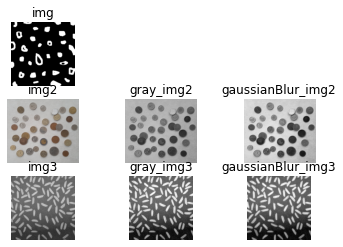

In [63]:
plt.figure('images')

plt.subplot(3, 3, 1), plt.title('img'), plt.axis('OFF'), plt.imshow(img)

plt.subplot(3, 3, 4), plt.title('img2'), plt.axis('OFF'), plt.imshow(img2)
plt.subplot(3, 3, 5), plt.title('gray_img2'), plt.axis('OFF'), plt.imshow(gray_img2, cmap='gray')
plt.subplot(3, 3, 6), plt.title('gaussianBlur_img2'), plt.axis('OFF'), plt.imshow(gaussianBlur_img2, cmap='gray')

plt.subplot(3, 3, 7), plt.title('img3'), plt.axis('OFF'), plt.imshow(img3)
plt.subplot(3, 3, 8), plt.title('gray_img3'), plt.axis('OFF'), plt.imshow(gray_img3, cmap='gray')
plt.subplot(3, 3, 9), plt.title('gaussianBlur_img3'), plt.axis('OFF'), plt.imshow(gaussianBlur_img3, cmap='gray')

plt.show()

## Letra B:

<b>Objetivo:</b> Extrair o conteúdo do fundo removendo-o do processo (usar técnicas de limiarização, extração de bordas e/ou operadores morfológicos para melhorar o  resultado obtido). Utilize livremente as funções existentes na OpenCV. Atente-se ao fato de que, algumas imagens podem não possuir uma uniformidade nas cores do fundo ou terem espaços de cores diferentes. Seu código deverá se adaptar automaticamente, ou ser genérico o suficiente para tratar todos os casos.

<b>Escolha</b>: O algórtimo será genérico para que seja capaz de tratar ambos os exemplos por questões de simplicidade e bons resultados.

Desta forma, criamos uma função chamada remove_background. Essa função será responsável em remover o fundo da imagem de forma
genérica, onde tem-se if's específicos que tratará cada caso. 

1. O primeiro caso foi o mais fácil de tratar pois a imagem já encontrava limiarizada, então foi utilizado apenas o algoritmo floodfill para preencher os buracos;
2. O segundo caso foi o mais complicado pois, foi necessário utilizar o canny para extrair as bordas, com adição de vários operadores morfológicos para que chegue em um resultado favorável;
3. Já o terceiro caso utilizou também o canny, porem, necessitou de menos operações para chegar em um resultado satisfatório.

In [64]:
# LETRA B: REMOVE O FUNDO DA IMAGEM

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
    
def remove_background(img,  what_img):
    # CASO PARA A 2A IMAGEM
    if(what_img == 2):
        canny_img = cv.Canny(img, 100, 0)
        
        kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, [7, 7])
        canny_img = cv.morphologyEx(canny_img, cv.MORPH_CLOSE, kernel, iterations=2)
        
        img = canny_img.copy()
    # CASO PARA A 3A IMAGEM
    if(what_img == 3):
        canny_img = cv.Canny(img, 100, 113)
        
        kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, [3, 3])
        canny_img = cv.morphologyEx(canny_img, cv.MORPH_CLOSE, kernel, iterations=1)
        
        img = canny_img.copy()
    
    img_floodfill = img.copy()
    height, width = img_floodfill.shape[:2]
    mask = np.zeros((height+2, width+2), np.uint8)
    
    cv.floodFill(img_floodfill, mask, (0, 0), 255)
    
    inverse_floodFill = cv.bitwise_not(img_floodfill)    
    
    # APRIMORAMENTOS
    if(what_img == 1):
        foreground_img = cv.bitwise_or(img, inverse_floodFill)
    if(what_img == 2):
        foreground_img = cv.bitwise_or(img, inverse_floodFill)
        kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, [75, 75])
        foreground_img = cv.morphologyEx(foreground_img, cv.MORPH_OPEN, kernel, iterations=1)
        
        kernel2 = cv.getStructuringElement(cv.MORPH_ELLIPSE, [3, 3])
        foreground_img = cv.erode(foreground_img, kernel2, iterations=2)
        foreground_img = cv.morphologyEx(foreground_img, cv.MORPH_OPEN, kernel)
    if(what_img == 3):
        kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, [3, 3])
        inverse_floodFill = cv.morphologyEx(inverse_floodFill, cv.MORPH_OPEN, kernel, iterations=2)
        inverse_floodFill = cv.dilate(inverse_floodFill, kernel, iterations=1)
       
        foreground_img = inverse_floodFill.copy()
    
    
    plt.subplot(2, 2, 1), plt.title('1'), plt.axis('OFF'), plt.imshow(img, cmap='gray')
    plt.subplot(2, 2, 2), plt.title('2'), plt.axis('OFF'), plt.imshow(img_floodfill, cmap='gray')
    plt.subplot(2, 2, 3), plt.title('3'), plt.axis('OFF'), plt.imshow(inverse_floodFill, cmap='gray')
    plt.subplot(2, 2, 4), plt.title('4'), plt.axis('OFF'), plt.imshow(foreground_img, cmap='gray')

    plt.show()

    return foreground_img

IMPRESSÃO DOS RESULTADOS:
    
1 - Para o primeiro caso, o objetivo no geral foi tampar os buracos para que não haja problemas na hora de fazer a rotulagem.

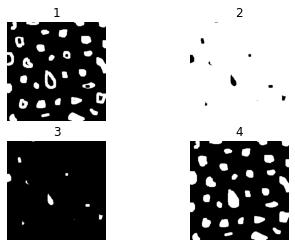

In [65]:
thresh_img = remove_background(gray_img, 1)

2 - Já o segundo caso apresentou-se bastante complexo e difícil de remover o fundo. Não era possível realizar de imediato,
um limiar na imagem pois a moeda branca contida na imagem não aparecia. Desta forma foi pensando em realizar ao mesmo tempo
o limiar e o canny da imagem (detectar bordas). Depois utilizar uma sequência de operadores morfológicos.

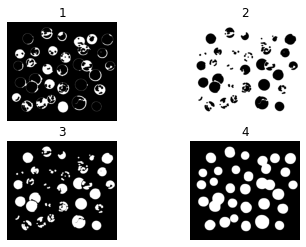

In [66]:
thresh_img2 = remove_background(gaussianBlur_img2, 2)

3 - O terceiro caso de fato também não foi fácil, porem não chega a ser igual o 2 caso. Basta extrair a borda e em seguida utilizar uma sequência de operadores morfológicos que é menor em comparação com o do caso anterior

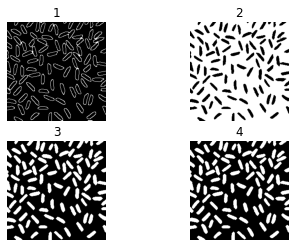

In [67]:
thresh_img3 = remove_background(gaussianBlur_img3, 3)

## Letra C

<b>Objetivo</b>: Implementar um algoritmo de segmentação baseado na técnica de inundação (usando um algoritmo de busca em largura, por exemplo) para atribuir um número inteiro único a cada objeto conectado presente na imagem (pode-se utilizar vizinhança-4 apenas). Por exemplo, o primeiro objeto fortemente conectado encontrado terá o número 1, o segundo o número 2, e assim por diante.

<b>Escolha:</b> Algorítmo de rotulação de objetos conectados por busca e largura utilizando a vizinhança-4.

Funções:
    
- def is_bound_pixel(img, i, j): Fica responsável em analisar se determinada adjacência dos pixels estão no limite da imagem
(que não se encontra fora do domínio em questão). Nesta função a 3 if's, sendo 2 que retorna  um valor em booleano para falso
quando realmente este pixel vizinho estiver fora e verdaeiro caso ele se encontra dentro da imagem.

In [68]:
# LETRA C: FAZ A ROTULAGEM DE COMPONENTES CONECTADOS

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

# ALGORITMO DE ROTULAGEM DE COMPONENTES CONECTADOS - MÉTODO DE BUSCA POR LARGURA
# - ENTRADA:    IMAGEM LIMIARIZADA;
# - SAIDA:      IMAGEM ROTULADA;

# VERIFICA SE A VIZINHANÇA ESTÁ NO LIMITE
def is_bound_pixel(img, i, j):
    if (i < 0) or (j < 0):
        return False
    if (i > img.shape[0]-1) or (j > img.shape[1]-1):
        return False
    
    return True

- def find_neighbors(img): Encontra  os possíveis vizinhos em 4, armazenando-os em uma fila. Ao final, é
    retornado um vetor contendo os possíveis vizinhos dos pixels analisados em questão.

In [69]:
# ENCONTRA OS POSSIVEIS VIZINHOS DO PIXEL ANALISADO EM QUESTÃO
def find_neighbors(img):
    final_pixel_neighbor = np.zeros((img.shape), dtype=object)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            p_up = (i-1, j)
            p_down = (i+1, j)
            p_left = (i, j-1)
            p_right = (i, j+1)
            pixel_neighbor = []

            if is_bound_pixel(img, p_up[0], p_up[1]):
                pixel_neighbor.append((p_up))
            if is_bound_pixel(img, p_down[0], p_down[1]):
                pixel_neighbor.append((p_down))
            if is_bound_pixel(img, p_left[0], p_left[1]):
                pixel_neighbor.append((p_left))
            if is_bound_pixel(img, p_right[0], p_right[1]):
                pixel_neighbor.append((p_right))
                
            final_pixel_neighbor[i, j] = pixel_neighbor
    
    return final_pixel_neighbor

- def labeling_breadthSearch(thresh_img): Basicamente o cérebro do algóritmo. Esta função é responsável em fazer todo o processo
de rotulagem dos objetos da imagem com auxílio das funções descritas anteriormente. Para que a rotulagem seja realizada,
o algoritmo utilizará a estrutura de dados do tipo fila que ficará responsável em armazenar os pixels conecados.

1. Cria uma fila e faz a chamad do método para encontrar a vizinhança 4;

2. Dentro do for aninhado, primeiramente verifica-se dado determinado pixel possui valor 255 (branco), caso obedeça este píxel é rotulado e armazenado na fila;

3. O while agora fica responsável em analisar a vizinhança deste pixel enquanto a fila não for vazia. Primeiramente retiramos
o primeiro elemento da fila o qual a variável q que seria o vizinho recebe este elemento; 

4. Dentro do for, estamos fazendo a busca por possiveis vizinhos deste pixel (determinado objeto com n pixels, e cada pixel desse objeto tem seus vizinhos adjacentes). Desta forma, vamos percorrer cada pixel desse objeto para rotular-los. Caso o valor seja 255, fazs-se a rotulação e insere na fila. Este processo é repetido para tods os pixels vizinhos desse objeto até que no final o while pare de ser executado. É incrmeentado +1 o valor na variável label e este processo é repetido para o próximo objeto da imagem.

In [70]:
# FAZ O PROCESSO DE ROTULAGEM
def labeling_breadthSearch(thresh_img):
    label_img = thresh_img.copy()
    label = 0
    queue = []
    pixel_neighbor = find_neighbors(label_img)
    
    for i in range(label_img.shape[0]):
        for j in range(label_img.shape[1]):
                            
            p = (i, j)
            if(label_img[p] == 255):
                label += 1
                label_img[p] = label
                queue.append((p))
                
                while queue:
                    q = queue.pop()
                    for q in pixel_neighbor[q]:
                        if(label_img[q] == 255):
                            label_img[q] = label
                            queue.append(q)
                            
    # print(label_img)
    plt.title('label_img'), plt.axis('off'), plt.imshow(label_img, cmap='gray'), plt.show()
    
    return label_img

1. Saída da primeira imagem:

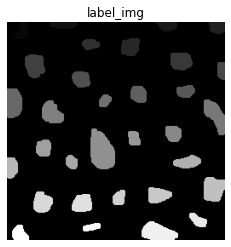

In [71]:
label_img = labeling_breadthSearch(thresh_img)

2. Saída da segunda imagem:

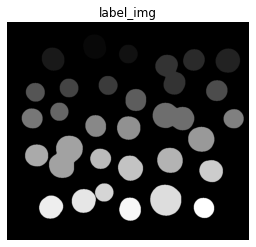

In [72]:
label_img2 = labeling_breadthSearch(thresh_img2)

3. Saída da terceira imagem:

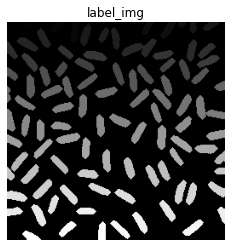

In [73]:
label_img3 = labeling_breadthSearch(thresh_img3)

## Letra D:

<b>Objetivo:</b> Mostrar o número de objetos encontrados e uma imagem colorida com cores distintas atribuídas a cada objeto encontrado (Deverá ser implementado. Ideia: gere uma imagem no espaço de cor HSV com as bandas de Saturação e Intensidade no máximo, e a com a banda de Hue contendo valores uniformemente distribuídos para cada objeto encontrado. Por exemplo, levando-se em consideração que o valor de Hue varia de 0 a 179, se tivermos 18 objetos encontrados, teremos, para o primeiro objeto a valor de Hue 0, para o segundo 10, para o terceiro 20, e assim sucessivamente).

Função: generate_core_map: Fica responsável em gerar um mapa de cores na imagem rotulada.

1. A ideia por traz dessa função foi primeiramente fazer um get dos valores das cores (de HSV para RGB) em um array. Para isso, foi considerado que precisava fazer uma equação dentro do for:
    
- <b>valor da matiz acumulada = 180 / quantidade de objetos na imagem (ou valor máximo)</b>.

    Portanto, obtia assim o valor acumulador que se somaria todas as vezes (o primeiro obj recebe 0, o segundo 5...) que passava de um loop do for enquanto a condição for verdadeira. Em faço a conversão do valor de HSV para RGB seguida armazenaria os valores das cores em RGB em um array (arr_color).

2. Já os 3 for's aninhados ficam responsáveis em mapear as cores. Sendo o primeiro para a quantidade de objetos. o segundo e o terceiro para as dimensões da  imagem. Desta forma, enquanto a condição for verdadeira (em que dado um pixel de img[p] possuir o mesmo valor do indice k), faça o mapeamento da cor conforme o indice do array arr_color que acumulou os valores em RGB das cores.

In [52]:
# LETRA D: MOSTRA A QUANTIDADES DE OBJETOS E COLORE A IMAGEM

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

def generate_core_map(img):
    # Recebe o valor máximo da matriz (img)
    maximum_value = np.max(img)
    # Contador para matiz. Na verdade é um acumulador de valor
    hue_counter = 0
    # Armazena as cores
    arr_color = []
    
    # Mostra a quantidade de objetos na imagem
    print("Objects counted:", maximum_value)
    
    # Cria uma matriz para receber em cores em HSV, depois RGB
    hsv2rgb_img = np.zeros((1, 1, 3), dtype=np.uint8)
    img = cv.cvtColor(img, cv.COLOR_GRAY2RGB)
    
    # FOR RESPONSÁVEL EM ARMAZENAR O VALORES EM HSV/RGB
    for i in range(maximum_value):
        
        # ENQUANTO hue_counter for menor a 180
        if(hue_counter < 180):
            # PRIMEIRAMENTE hsv2rgb_img recebe um valor em HSV (0, 255, 255)
            hsv2rgb_img[::] = (hue_counter, 255, 255)
            
            # A FILA FICA RESPONSÁVEL EM ARMAZENAR AS CORES GERADAS EM RGB
            arr_color.append(cv.cvtColor(hsv2rgb_img, cv.COLOR_HSV2RGB))
            # O ACUMULADOR INCREMENTA O VALOR DE 180 / maximum_value (quant. máxima de  objetos)
            hue_counter += int(np.floor(180 / maximum_value))
               
    # Cria uma matriz em rgb conforme as dimensões da imagem
    rgb_img = np.zeros(img.shape, dtype=np.uint8)
    
    # O PRIMEIRO FOR COMEÇA DE 0 ATÉ O NÚMERO ROTULADO DO ÚLTIMO OBJETO
    for k in range(maximum_value):
        # O SEGUNDO FOR CUIDA DAS LINHAS (ALTURA DA IMAGEM)
        for i in range(img.shape[0]):
            # O TERCEIRO FOR CUIDA DAS COLUNAS (LARGURA DA IMAGEM)
            for j in range(img.shape[1]):
                p = (i, j, 2)    
                
                # CASO A IMAGEM COM INDICE P TIVER VALORES MAIORES QUE ZERO
                if(img[p] == (k + 1)):
                    # A MATRIZ rgb_img = recebe o primeiro valor do arr_color[k] e assim sucessivamente
                    rgb_img[i, j] = arr_color[k]
                    
    # Imprime a imagem já colorida.
    plt.title('Color Image'), plt.axis('OFF'), plt.imshow(rgb_img)
    plt.show()
        
    return rgb_img

1. Saída da primeira imagem:

Objects counted: 32


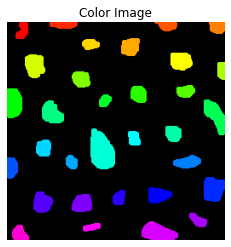

In [53]:
color_img = generate_core_map(label_img)

2. Saída da segunda imagem:

Objects counted: 30


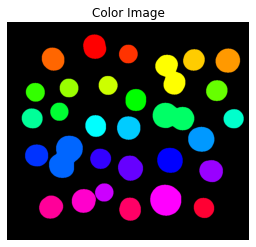

In [54]:
color_img2 = generate_core_map(label_img2)

3. Saída da terceira imagem:

Objects counted: 97


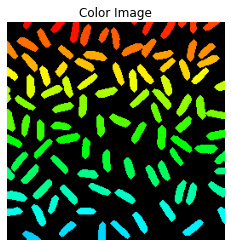

In [55]:
color_img3 = generate_core_map(label_img3)

## Letra E:

<b>Objetivo:</b> Utilizar o histograma da imagem obtida no item 3 para exibir na tela a área em pixels de cada objeto encontrado (exceto o fundo).

Um histograma é gerado através da variável <i>img_ravel</i>. Somente valores a partir do valor 1 é contabilizado, caso
ao contrário, seria contado também os pixels com valor 0. Ao final faz-se a impressão de um array contendo a quantidade
de pixels de cada objeto.

In [74]:
# LETRA E: MOSTRA O HISTOGRAMA DA IMAGEM ROTULADA E A AREA DE CADA PIXELS

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

def generate_histogram(img):
    img_ravel = np.ravel(img)
    ir = np.where(img_ravel > 0)
    
    histogram = plt.hist(img_ravel[ir], 256, [0, 256])
    
    arr_pixelsObjects = histogram[0]
    ap = np.where(arr_pixelsObjects > 0)
    
    plt.title('Histogram'), plt.show()
    print("Area of objects in number of pixels:"), print(arr_pixelsObjects[ap])

Saida:

1. Primeira imagem:

In label_img:



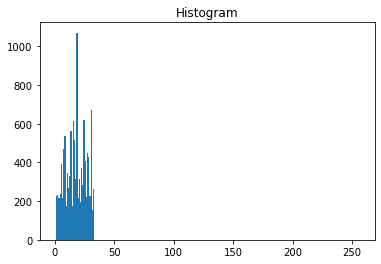

Area of objects in number of pixels:
[ 225.  232.  217.  235.  391.  215.  467.  538.  177.  347.  267.  331.
  561.  175.  613.  516.  315. 1070.  218.  312.  193.  370.  284.  617.
  408.  221.  449.  428.  225.  669.  153.  265.]


(None, None)

In [75]:
print("In label_img:\n"), generate_histogram(label_img)

2. Segunda Imagem:


In label_img2:



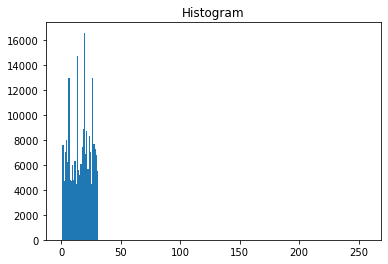

Area of objects in number of pixels:
[ 7604.  4678.  7014.  7948.  6236. 12906.  4810.  4724.  6018.  4760.
  6295.  4448. 14675.  5609.  5192.  6067.  7428.  8842. 16562.  6895.
  8684.  5650.  8276.  7001.  4478. 12963.  7687.  7267.  6764.  5536.]


(None, None)

In [76]:
print("\nIn label_img2:\n"), generate_histogram(label_img2)

3. Terceira Imagem:


In label_img3:



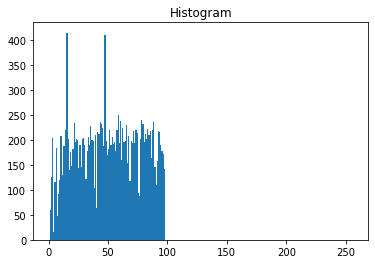

Area of objects in number of pixels:
[ 59. 125. 203.  16. 115. 183.  48.  91. 120. 208. 129. 187. 188. 219.
 414. 201. 140. 176. 147. 182. 233. 196. 202. 199. 143. 190. 146. 201.
 204. 190. 122. 177. 206. 189. 227. 200. 197. 104. 210.  64. 216. 211.
 235. 231. 223. 187. 410. 197. 170. 182. 220. 189. 206. 191. 196. 177.
 220. 250. 194. 237. 159. 224. 196. 198. 229. 153. 208. 117. 198. 193.
 217. 194. 220. 213.  93.  87. 201. 240. 231. 196. 212. 201. 222. 210.
 217. 163. 220. 236. 145. 110. 157. 217. 216. 190. 178. 172. 142.]


(None, None)

In [77]:
print("\nIn label_img3:\n"), generate_histogram(label_img3)